# A demo of spherical aberrations 
## introduced by coverslip and refractive index mistmatch 
## between aqueus sample, glass coverslip, and immersion media

**Assumptions:**

1. point source is inside an aqueous sample at varyng depth from the coverslip: 0 - 80 microns

2. standard coverslip No1.5, thickness 170 microns

3. only sample|glass|immersion media are simulated. The objective is not simulated.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
n_sample = 1.3325 #water or slightly higher
# n= 1.37 @ 633 nm is C.elegans RI, ref: https://www.ncbi.nlm.nih.gov/pubmed/17694065/
n_glass = 1.5230 #@589 nm, D263M borosilicate glass for coverslips, from Fischer Scientific datasheet
thickness_glass = 170. #microns, No1.5 standard glass
thickness_media = 130. #um, immersion media thickness until some dummy surface, just for ray plotting

n_immersionArray = np.array([1.3325, 1.4722, 1.515]) #water, glycerol, immersion oil
immersionLabel = ['water','glycerol', 'oil']
sourceDistanceArray = np.array([0, 10, 20, 40, 80])# microns, distance from point source to coverslip surface
thetaDegArray = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45]) #ray angle from the point source, in degrees
thetaRadArray = thetaDegArray/180.0*np.pi

NA = np.sin(thetaRadArray[-1])*n_sample #max NA of the system

In [7]:
# ray tracing, sags [x], axial heights [y] and angles [thetas]
# coordinate origin X at sample | glass boundary
def ray_tracing(sourceDistance, n_immersion, thickness_media):
    #rays origin
    x0 = -sourceDistance*np.ones(thetaRadArray.shape)
    y0 = np.zeros(thetaRadArray.shape)
    #rays refract from sample to glass
    x1 = x0 + sourceDistance * np.ones(thetaRadArray.shape)
    y1 = y0 + sourceDistance * np.tan(thetaRadArray)
    sinTheta1 = n_sample/n_glass * np.sin(thetaRadArray)
    tanTheta1 = sinTheta1/(np.sqrt(1-sinTheta1**2))

    #rays refract from glass to immersion media
    x2 = x1 + thickness_glass
    y2 = y1 + thickness_glass*tanTheta1
    sinTheta2 = n_glass/n_immersion * sinTheta1
    tanTheta2 = sinTheta2/(np.sqrt(1-sinTheta2**2))

    #rays travel until some dummy surface
    x3 = x2 + thickness_media
    y3 = y2 + thickness_media * tanTheta2
    return (x0,y0,x1,y1,x2,y2,x3,y3,tanTheta2) 

### Plot refracted rays emanating from a point souce, located 10 or 80 microns deep

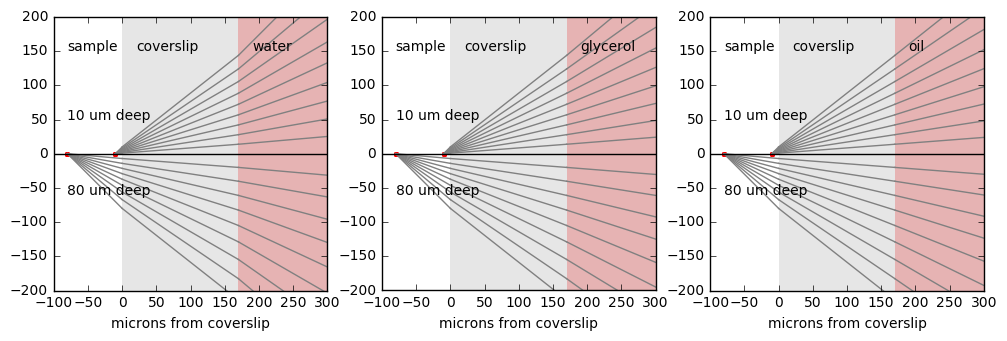

In [89]:
fig, ax = plt.subplots(1,3,figsize = (12,4))
for i in range(3):
    ax[i].bar(0, 500, width=thickness_glass, bottom=-250,color = [0.9, 0.9, 0.9], linewidth=0)
    ax[i].bar(0 + thickness_glass, 500, width=thickness_media, bottom=-250,color = [0.9, 0.7, 0.7], linewidth=0)
    #near source
    (x0,y0,x1,y1,x2,y2,x3,y3,tanTheta2) = ray_tracing(sourceDistanceArray[1],n_immersionArray[i],thickness_media)
    ax[i].plot(x0,y0,'r.',label = 'point source')
    ax[i].plot([x0, x1], [y0, y1],'gray' )
    ax[i].plot([x1, x2], [y1, y2],'gray' )
    ax[i].plot([x2, x3], [y2, y3],'gray' )
    #far source
    (x0,y0,x1,y1,x2,y2,x3,y3,tanTheta2) = ray_tracing(sourceDistanceArray[4],n_immersionArray[i],thickness_media)
    ax[i].plot(x0,y0,'r.',label = 'point source')
    ax[i].plot([x0, x1], [-y0, -y1],'gray' )
    ax[i].plot([x1, x2], [-y1, -y2],'gray' )
    ax[i].plot([x2, x3], [-y2, -y3],'gray' )
    
    ax[i].set_aspect('equal', 'box')
    ax[i].set_xlim([-100, 300])
    ax[i].set_ylim([-200, 200])
    ax[i].set_xlabel('microns from coverslip')
    ax[i].axhline(y=0, color='k')
    ax[i].text(-80,150,'sample')
    ax[i].text(-80,50,'10 um deep')
    ax[i].text(-80,-60,'80 um deep')
    ax[i].text(20,150,'coverslip')
    ax[i].text(thickness_glass + 20,150,immersionLabel[i])

### Find the axial points where rays seem to come from (apparent sources) and plot them

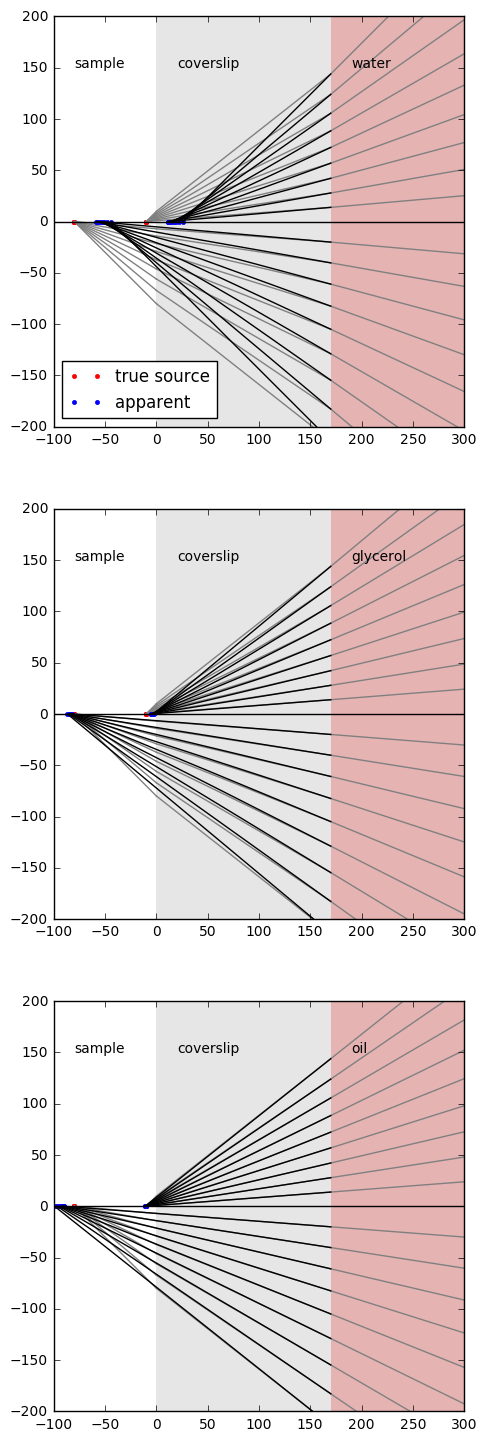

In [96]:
fig, ax = plt.subplots(3,1,figsize = (6,18))
for i in range(3):
    ax[i].bar(0, 500, width=thickness_glass, bottom=-250,color = [0.9, 0.9, 0.9], linewidth=0)
    ax[i].bar(thickness_glass, 500, width=thickness_media, bottom=-250,color = [0.9, 0.7, 0.7], linewidth=0)
    #near source
    (x0,y0,x1,y1,x2,y2,x3,y3,tanTheta2) = ray_tracing(sourceDistanceArray[1],n_immersionArray[i],thickness_media)
    ax[i].plot(x0,y0,'r.',label = 'true source')
    ax[i].plot([x0, x1], [y0, y1],'gray' )
    ax[i].plot([x1, x2], [y1, y2],'gray' )
    ax[i].plot([x2, x3], [y2, y3],'gray' )
    
    apparent_x0 = x2 - y2/tanTheta2
    ax[i].plot(apparent_x0,y0,'b.')
    ax[i].plot(apparent_x0[0],y0[0],'b.',label='apparent')
    ax[i].plot([apparent_x0,x2],[y0,y2],'k-')
    
    #far source
    (x0,y0,x1,y1,x2,y2,x3,y3,tanTheta2) = ray_tracing(sourceDistanceArray[4],n_immersionArray[i],thickness_media)
    ax[i].plot(x0,y0,'r.')
    ax[i].plot([x0, x1], [-y0, -y1],'gray' )
    ax[i].plot([x1, x2], [-y1, -y2],'gray' )
    ax[i].plot([x2, x3], [-y2, -y3],'gray')
    
    apparent_x0 = x2 - y2/tanTheta2
    ax[i].plot(apparent_x0,y0,'b.')
    ax[i].plot([apparent_x0,x2],[y0,-y2],'k-')
    
    ax[i].set_aspect('equal', 'box')
    ax[i].set_xlim([-100, 300])
    ax[i].set_ylim([-200, 200])
    #ax[i].grid(True, which='both')
    ax[i].axhline(y=0, color='k')
    ax[i].text(-80,150,'sample')
    ax[i].text(20,150,'coverslip')
    ax[i].text(thickness_glass + 20,150,immersionLabel[i])
ax[0].legend(loc='lower left')

### Plot the positions of true and apparent sources

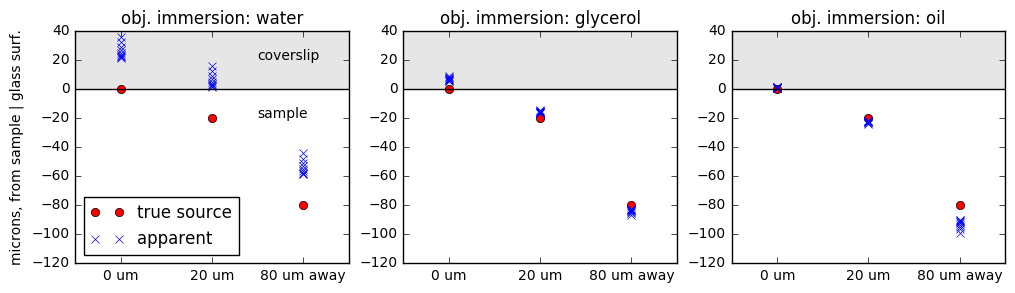

In [101]:
fig, ax = plt.subplots(1,3,figsize = (12,3))
for i in range(len(n_immersionArray)):
    ax[i].bar(-1, 40, 4, color = [0.9, 0.9, 0.9], linewidth=0)
    #source at the glass surface 
    (x0,y0,x1,y1,x2,y2,x3,y3,tanTheta2) = ray_tracing(sourceDistanceArray[0],n_immersionArray[i],thickness_media)  
    apparent_x0 = x2 - y2/tanTheta2
    ax[i].plot(0,x0[0],'ro')  
    ax[i].plot(0*np.ones(len(apparent_x0)),apparent_x0,'bx')

    #source 20 um away  
    (x0,y0,x1,y1,x2,y2,x3,y3,tanTheta2) = ray_tracing(sourceDistanceArray[2],n_immersionArray[i],thickness_media)  
    apparent_x0 = x2 - y2/tanTheta2
    ax[i].plot(1,x0[0],'ro')  
    ax[i].plot(np.ones(len(apparent_x0)),apparent_x0,'bx')
    
    #source 80 um away
    (x0,y0,x1,y1,x2,y2,x3,y3,tanTheta2) = ray_tracing(sourceDistanceArray[4],n_immersionArray[i],thickness_media)
    apparent_x0 = x2 - y2/tanTheta2
    ax[i].plot(2,x0[0],'ro',label='true source')  
    ax[i].plot(2*np.ones(len(apparent_x0)),apparent_x0,'bx',label='apparent')
    
    ax[i].set_xlim([-0.5, 2.5])
    ax[i].set_ylim([-120, 40])
    ax[i].axhline(y=0, color='k')
    ax[i].set_xticks([0,1,2])
    ax[i].set_xticklabels(['0 um', '20 um', '80 um away'])
    ax[i].set_title('obj. immersion: ' + immersionLabel[i])
    
ax[0].legend(loc='lower left')    
ax[0].set_ylabel('microns, from sample | glass surf.')
ax[0].text(1.5,20,'coverslip')
ax[0].text(1.5,-20,'sample')


## Compare to ray tracing model from Wan etal, 2000

Wan DS, Rajadhyaksha M, Webb RH. 
Analysis of spherical aberration of a water immersion objective: application to specimens with refractive indices 1.33-1.40.
J Microsc. 2000 Mar;197(Pt 3):274-84.
https://www.ncbi.nlm.nih.gov/pubmed/10692131

In [102]:
def virtualSourcesModel(sourceDistance, n_sample, n_glass, n_immersion, thickness_glass, NA):
    # position of paraxial virtual source, NA~0
    virtual_x0_highNA = thickness_glass \
                        - sourceDistance*np.sqrt((n_immersion**2 - NA**2)/(n_sample**2 - NA**2)) \
                        - thickness_glass*np.sqrt((n_immersion**2 - NA**2)/(n_glass**2 - NA**2))
    virtual_x0_lowNA =  thickness_glass \
                        - sourceDistance * n_immersion/n_sample \
                        - thickness_glass*n_immersion/n_glass
    return (virtual_x0_lowNA, virtual_x0_highNA)

Plot the distribution of apparent sources

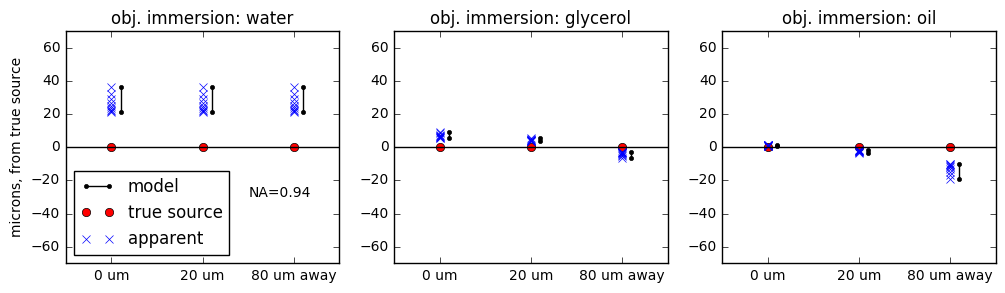

In [103]:
fig, ax = plt.subplots(1,3,figsize = (12,3))
for i in range(len(n_immersionArray)):
    #source at the glass surface 
    (x0,y0,x1,y1,x2,y2,x3,y3,tanTheta2) = ray_tracing(sourceDistanceArray[0],n_immersionArray[i],thickness_media)  
    virtual_x0 = x2 - y2/tanTheta2
    ax[i].plot(0,0,'ro')  
    ax[i].plot(0*np.ones(len(virtual_x0)),virtual_x0 - x0,'bx')
    # model of Wan_etal_2000
    (virtual_x0_lowNA, virtual_x0_highNA) = virtualSourcesModel(sourceDistanceArray[0], n_sample, n_glass, \
                                                                n_immersionArray[i], thickness_glass, NA)
    ax[i].plot([0.1, 0.1],[virtual_x0_lowNA - x0[0], virtual_x0_highNA - x0[0]],'k.-', label = 'model') 

    #source 20 um away  
    (x0,y0,x1,y1,x2,y2,x3,y3,tanTheta2) = ray_tracing(sourceDistanceArray[2],n_immersionArray[i],thickness_media)  
    virtual_x0 = x2 - y2/tanTheta2
    ax[i].plot(1,0,'ro')  
    ax[i].plot(np.ones(len(virtual_x0)),virtual_x0 - x0,'bx')
    # model of Wan_etal_2000
    (virtual_x0_lowNA, virtual_x0_highNA) = virtualSourcesModel(sourceDistanceArray[2], n_sample, n_glass, \
                                                                n_immersionArray[i], thickness_glass, NA)
    ax[i].plot([1.1, 1.1],[virtual_x0_lowNA - x0[0], virtual_x0_highNA - x0[0]],'k.-') 
    
    #source 80 um away
    (x0,y0,x1,y1,x2,y2,x3,y3,tanTheta2) = ray_tracing(sourceDistanceArray[4],n_immersionArray[i],thickness_media)
    virtual_x0 = x2 - y2/tanTheta2
    ax[i].plot(2,0,'ro',label='true source')  
    ax[i].plot(2*np.ones(len(virtual_x0)),virtual_x0 - x0,'bx',label='apparent')
    # model of Wan_etal_2000
    (virtual_x0_lowNA, virtual_x0_highNA) = virtualSourcesModel(sourceDistanceArray[4], n_sample, n_glass, \
                                                                n_immersionArray[i], thickness_glass, NA)
    ax[i].plot([2.1, 2.1],[virtual_x0_lowNA - x0[0], virtual_x0_highNA - x0[0]],'k.-') 
    
    ax[i].set_xlim([-0.5, 2.5])
    ax[i].set_ylim([-70, 70])
    ax[i].axhline(y=0, color='k')
    ax[i].set_xticks([0,1,2])
    ax[i].set_xticklabels(['0 um', '20 um', '80 um away'])
    ax[i].set_title('obj. immersion: ' + immersionLabel[i])
    
ax[0].legend(loc='lower left')    
ax[0].set_ylabel('microns, from true source')
ax[0].text(1.5,-30,'NA='+'{:3.2f}'.format(np.sin(thetaRadArray[-1])*n_sample))

### Summary

1. **Water immersion:** Spherical aberration (SPHA) is large but does *not* depend on sample depth. It can be corrected by adjusting the objective collar. 

2. **Glycerol immersion:** SPHA is relatively small and goes from positive (close to coverslip) to negative (deeper into the sample).

3. **Oil immersion:** SPHA is nearly zero close to coverslip, but quickly grows with the sample depth. It needs to be adjusted by the objective collar, and adjustment is depth-dependent.

Questions and comments: nikita.vladimirov [at] mdc-berlin.de